<a href="https://colab.research.google.com/github/kamblechand/capstone-project-2--bike-sharing-demand-prediction/blob/main/Final_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#Import libraries.
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Ridge,Lasso)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#import required metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error,mean_absolute_error,mean_absolute_percentage_error)
from sklearn.preprocessing import MinMaxScaler
  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load dataset
df=pd.read_csv('/content/drive/MyDrive/chand/SeoulBikeData.csv',encoding ='unicode_escape')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew point temperature','Solar Radiation (MJ/m2)':'Solar Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'	},inplace=True)

In [7]:
#Rows and columns count.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [8]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [9]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [11]:
df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
len(df[df.duplicated()])#no duplicates values 

0

In [13]:
df['Date']=pd.to_datetime(df['Date'])#object to datetime format to extract year,month and day.
df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [14]:
df.info()#dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [15]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['date']=df['Date'].dt.day
df
#creating new colums for year,month and date.

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,date
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [16]:
df=df.drop(columns='Date')#dropping date columns 
df

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,date
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [17]:
df.info()#dataset information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  year                   8760 non-null   int64  
 14  month                  8760 non-null   int64  
 15  date

In [18]:
# uniques values in each column
df.nunique()

Rented Bike Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1789
Dew point temperature     556
Solar Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
year                        2
month                      12
date                       31
dtype: int64

# One Hot Encoding.

In [19]:
#creating dummies columns and drop first.
newdf=pd.get_dummies(df,columns=['Seasons','Holiday','Functioning Day','year','month','date','Hour'],drop_first=True)
newdf.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,year_2018,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,date_13,date_14,date_15,date_16,date_17,date_18,date_19,date_20,date_21,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#correlation between features.
newdf.corr()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,year_2018,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,date_13,date_14,date_15,date_16,date_17,date_18,date_19,date_20,date_21,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.288822e-02,2.965494e-01,-4.249251e-01,7.233757e-02,0.203943,2.151618e-01,-1.392509e-01,-4.392639e-02,3.151595e-02,8.997981e-02,1.285077e-01,1.061004e-01,5.711895e-02,-5.147333e-03,6.524433e-02,-8.958464e-03,-1.348852e-01,-1.481282e-01,-8.448320e-02,-3.225418e-02,3.185834e-02,1.671249e-01,6.951092e-02,4.456074e-02,1.311042e-01,7.981168e-03,-4.077770e-02,-1.144729e-01,4.523174e-02,1.701787e-02,6.579606e-03,4.170548e-03,1.352687e-02,-1.919345e-02,8.224357e-03,2.386190e-02,1.711018e-02,-1.185562e-03,-1.204171e-02,-1.663451e-02,2.451801e-02,-1.025105e-02,1.635481e-02,-4.039554e-02,1.895395e-02,-1.284722e-03,1.557253e-02,-0.090012,-0.130280,-0.162060,-0.184930,-0.182831,-0.134827,-0.031876,0.100578,-0.018951,-0.057153,-0.033542,-0.001669,0.009261,0.017530,0.040278,0.073072,0.140281,0.258096,0.158592,0.117798,0.105669,0.070542,-0.010823
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,7.959684e-03,6.658462e-01,-7.387196e-01,5.593084e-02,-0.050170,3.777958e-01,-1.544153e-01,-3.688838e-02,2.075321e-02,9.532769e-02,1.532142e-01,2.612509e-01,2.136488e-01,1.049498e-01,-1.976742e-02,-1.276695e-01,-2.560223e-01,-2.848985e-01,-1.205000e-01,-2.489034e-02,5.020706e-02,1.500457e-01,1.780672e-01,2.833890e-01,1.590503e-01,3.559600e-02,-3.056646e-02,-2.234260e-01,-4.115411e-03,1.733486e-02,2.706842e-02,1.352934e-02,-2.089373e-03,2.975722e-03,6.105897e-03,5.639587e-03,3.136519e-03,1.642904e-02,-3.986773e-03,-1.391329e-02,-8.992909e-03,-1.033824e-02,-1.109399e-02,1.742948e-03,2.225549e-02,2.101444e-02,1.304299e-02,-0.034210,-0.040002,-0.045201,-0.049869,-0.054365,-0.058000,-0.057642,-0.047239,-0.026309,0.000475,0.024916,0.045027,0.058879,0.068674,0.072505,0.070066,0.058864,0.042210,0.024399,0.008845,-0.002404,-0.011788,-0.019957
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.569416e-02,1.925949e-01,-2.382952e-01,5.027765e-02,-0.020800,3.592468e-02,-9.117630e-02,2.398551e-02,-6.754379e-02,3.762066e-02,1.089243e-01,3.530791e-02,7.140687e-02,3.741851e-02,2.631837e-02,-6.640068e-02,-4.059040e-02,-1.398893e-01,-3.180696e-03,2.527406e-02,6.416747e-02,-1.094680e-02,1.529275e-01,3.876256e-02,6.377587e-03,1.492974e-02,6.957545e-02,-3.204420e-02,3.799366e-03,4.156087e-02,3.869968e-02,4.270992e-03,-3.521981e-02,-1.673208e-02,-4.851966e-02,-3.990463e-02,-3.688622e-02,-3.264159e-02,2.341900e-02,2.200412e-02,-4.135095e-02,3.453507e-03,-1.478269e-02,1.298035e-02,7.288938e-03,3.703254e-02,-4.210922e-03,0.080928,0.092992,0.101493,0.107582,0.115690,0.122648,0.112716,0.082302,0.022457,-0.032731,-0.078435,-0.110055,-0.134240,-0.147539,-0.150092,-0.139767,-0.110644,-0.075489,-0.036126,-0.005319,0.019287,0.038870,0.054133
Wind speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,8.385451e-02,-6.469790e-02,1.091865e-01,-2.301677e-02,0.005037,-3.780878e-03,3.156739e-02,5.554696e-02,3.688681e-02,1.014297e-02,-8.757562e-03,-1.763684e-02,-1.404088e-02,-6.005735e-02,-1.965216e-02,-2.038926e-02,-1.886184e-02,1.202407e-01,1.984773e-02,1.132596e-01,2.145402e-02,4.649772e-03,-8.802069e-02,6.997424e-03,-9.189017e-03,1.624907e-05,-6.108448e-02,2.497549e

## Check skewness and data visualization

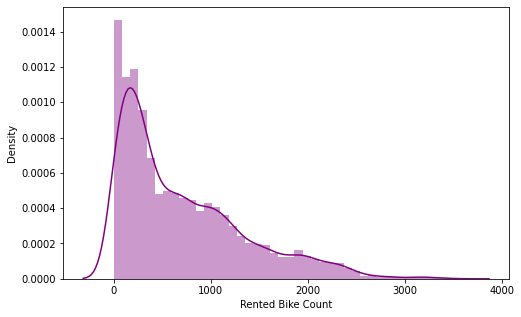

In [21]:
plt.figure(figsize=(8,5))#right skewed / positively skewed 
sns.distplot(df['Rented Bike Count'],color='purple')


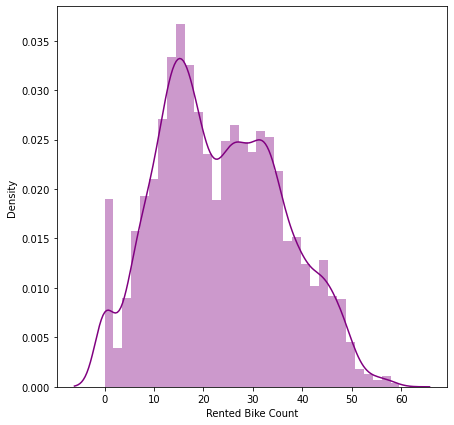

In [22]:
from matplotlib import colors
df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])
plt.figure(figsize=(7,7))#right skewed / positively skewed 
sns.distplot(df['Rented Bike Count'],color='purple')


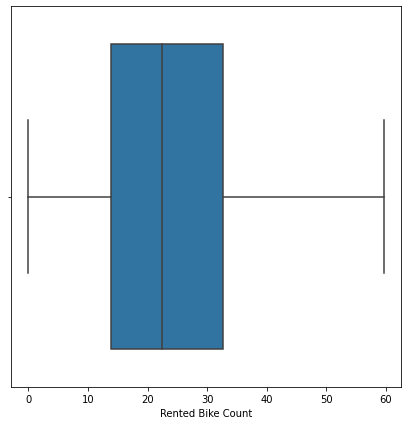

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(df['Rented Bike Count'])


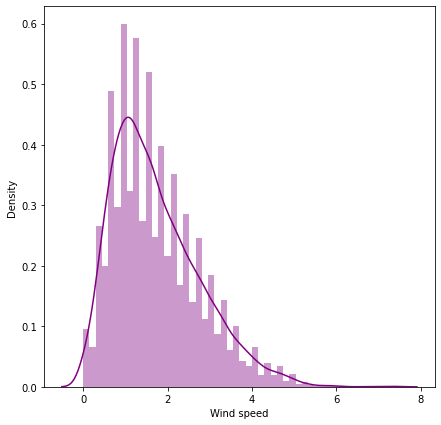

In [24]:
plt.figure(figsize=(7,7))
sns.distplot(df['Wind speed'],color='purple')

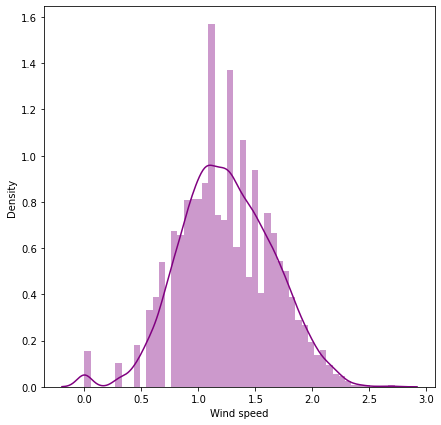

In [25]:
df['Wind speed']=np.sqrt(df['Wind speed'],)
plt.figure(figsize=(7,7))

sns.distplot(df['Wind speed'],color='purple')


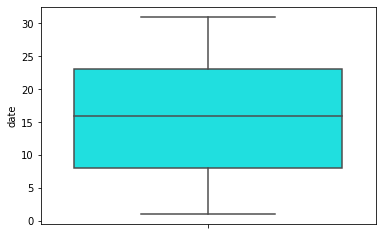

<Figure size 576x432 with 0 Axes>

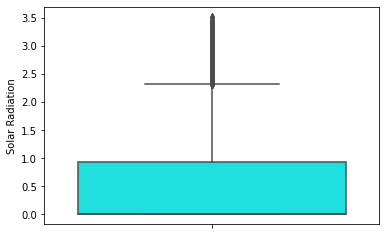

<Figure size 576x432 with 0 Axes>

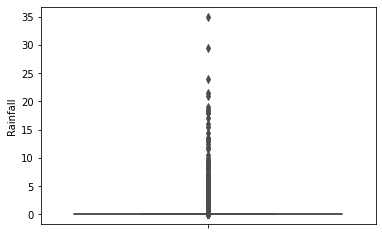

<Figure size 576x432 with 0 Axes>

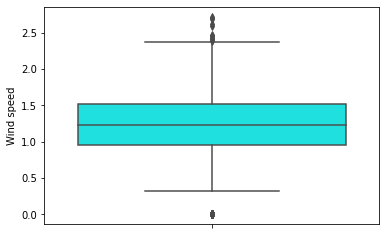

<Figure size 576x432 with 0 Axes>

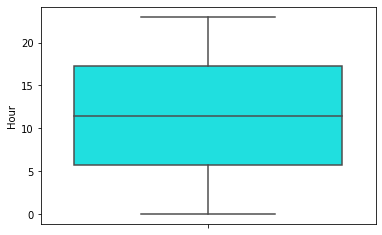

<Figure size 576x432 with 0 Axes>

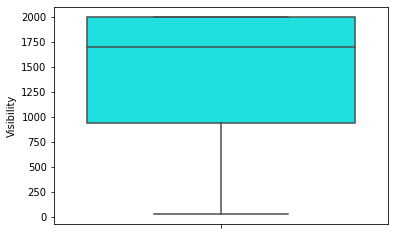

<Figure size 576x432 with 0 Axes>

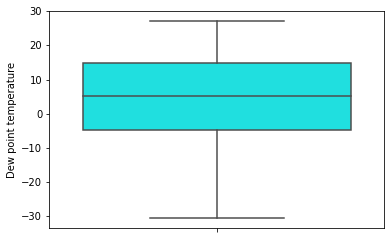

<Figure size 576x432 with 0 Axes>

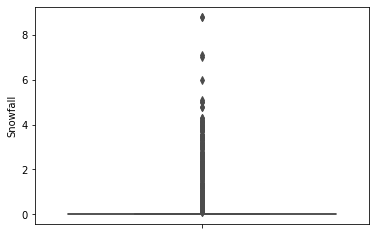

<Figure size 576x432 with 0 Axes>

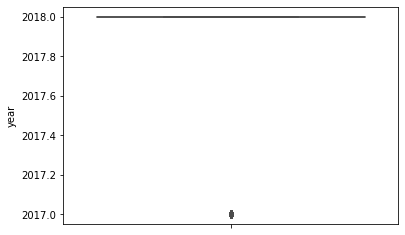

<Figure size 576x432 with 0 Axes>

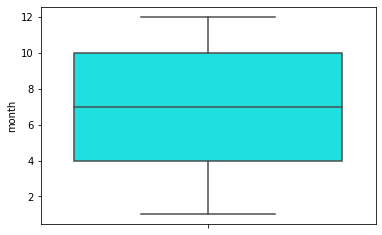

<Figure size 576x432 with 0 Axes>

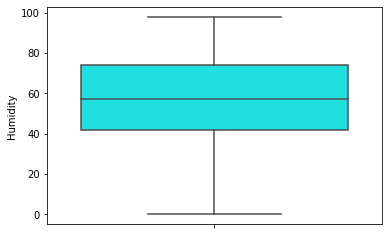

<Figure size 576x432 with 0 Axes>

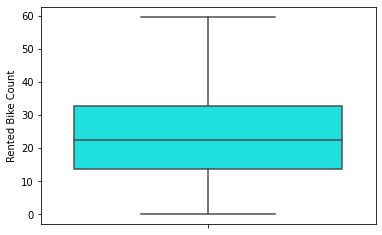

<Figure size 576x432 with 0 Axes>

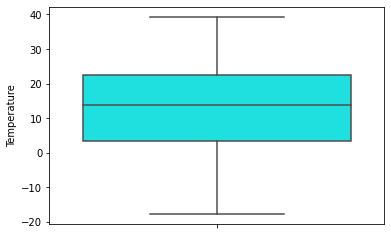

<Figure size 576x432 with 0 Axes>

In [26]:
# Numerical features plotting

num_var = list(set(df.describe()))
for i in num_var:
    sns.boxplot(y = df[i],color='cyan')
    plt.figure(figsize=(8,6))
    plt.show()

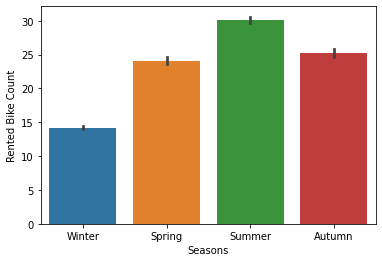

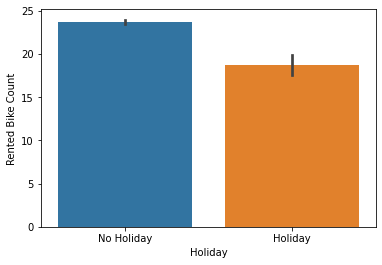

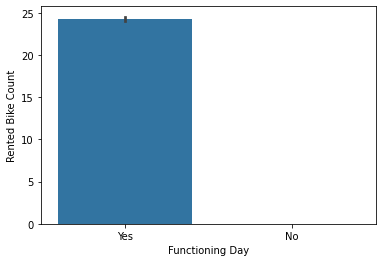

In [27]:
# categorical features plotting

cat_var = ['Seasons','Holiday','Functioning Day']
for i in cat_var:
    sns.barplot(x=df[i],y='Rented Bike Count',data=df)
    #sns.countplot(x = df[i])
    plt.show()


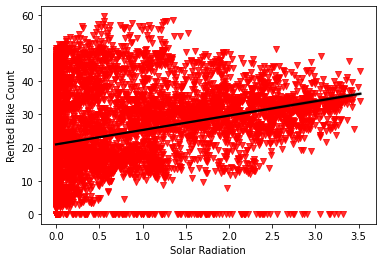

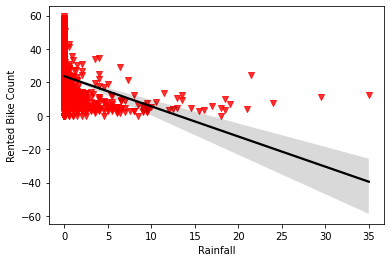

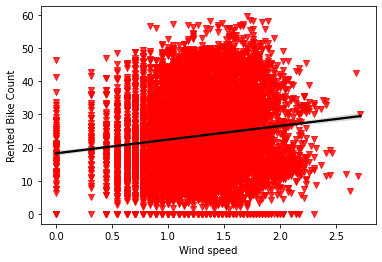

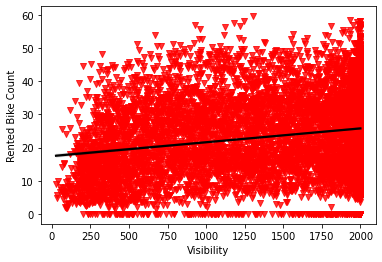

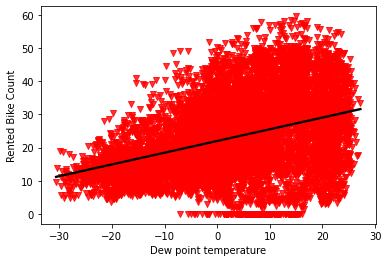

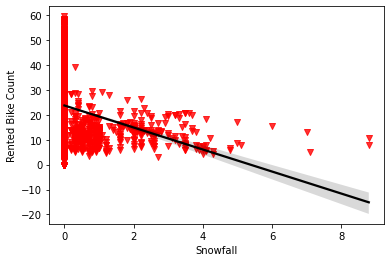

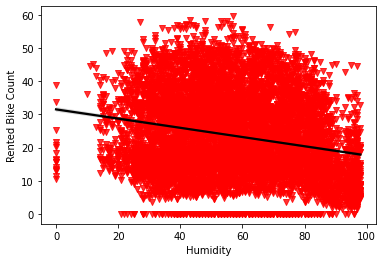

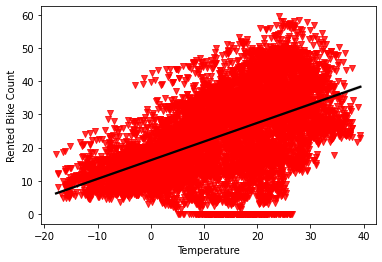

In [28]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in num_var[:]:
  if col in['Rented Bike Count','month','year','date','Hour']:
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],scatter_kws={'color':'r'},line_kws={"color": "black"},marker='v')
    
  plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

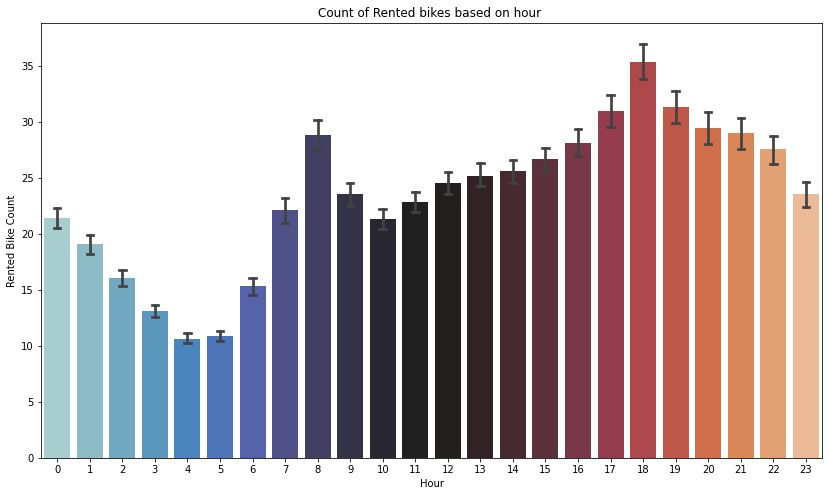

In [29]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2,palette = "icefire")
ax.set(title='Count of Rented bikes based on hour ')

Conclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

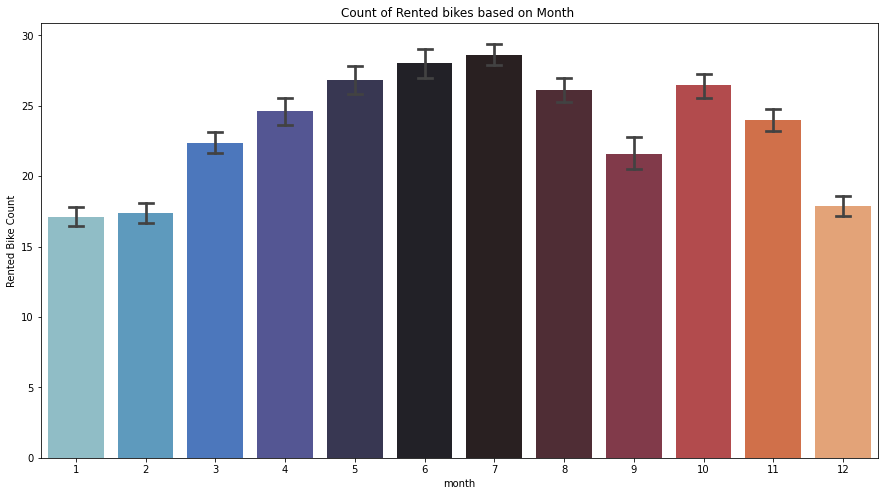

In [30]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2,palette = "icefire")
ax.set(title='Count of Rented bikes based on Month ')

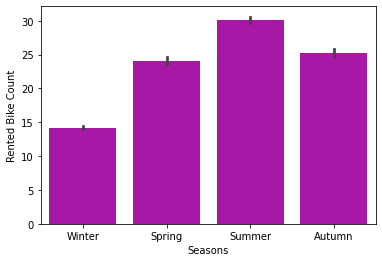

In [31]:
#ploting bar plot for more info
sns.barplot(x='Seasons',y='Rented Bike Count',data=df,color='m')

# Correlation Heatmap.

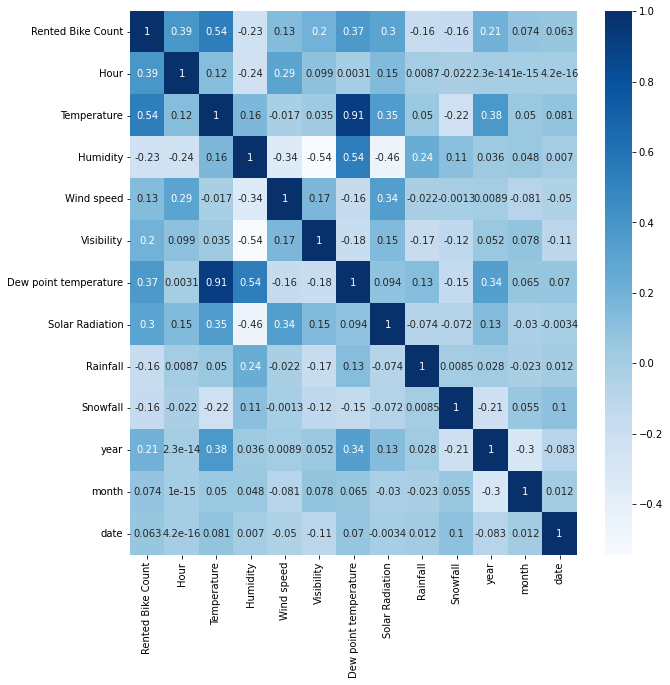

In [32]:
plt.figure(figsize=(10,10))

df=sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

from above graph Dew point temperature is higly correlated with the temperature,
here comes the problem of multicollinearity,by dropping the less correlated column with dependent variable problem of colinearity can be solved.

In [33]:
#dropping 'dew point temperatuer' column.
newdf=newdf.drop(['Dew point temperature'],axis=1)
newdf.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,year_2018,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,date_13,date_14,date_15,date_16,date_17,date_18,date_19,date_20,date_21,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
newdf.shape

(8760, 78)

# Split Dataset.

In [35]:
x= newdf.drop('Rented Bike Count',axis=1)
y= np.sqrt(newdf['Rented Bike Count'])
x[0:]

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,year_2018,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,date_13,date_14,date_15,date_16,date_17,date_18,date_19,date_20,date_21,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8756,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8757,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8758,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=429)

In [37]:
x_train.shape

(6570, 77)

In [38]:
x_test.shape

(2190, 77)

In [39]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Implimentation :Linear Regression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.score(x_train,y_train)

0.7751966832834425

In [43]:
#lr.coef_

In [44]:
lr.intercept_

-11.139402584040905

In [45]:
y_predt_test=lr.predict(x_test)

In [46]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_predt_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_predt_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_predt_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_predt_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.18670436018153
RMSE : 6.015538576069605
MAE : 4.598304269592001
R2 : 0.7715504021535617
Adjusted R2 : 0.7632215105654103


In [47]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'linear regression',
       'MAE':round((MAE ),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

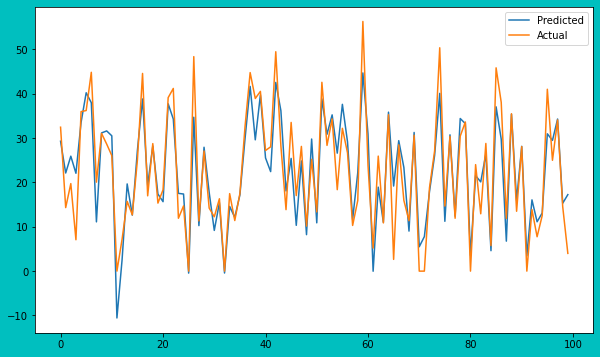

In [48]:
plt.figure(figsize=(10,6),facecolor='c',edgecolor='b')
plt.plot((y_predt_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

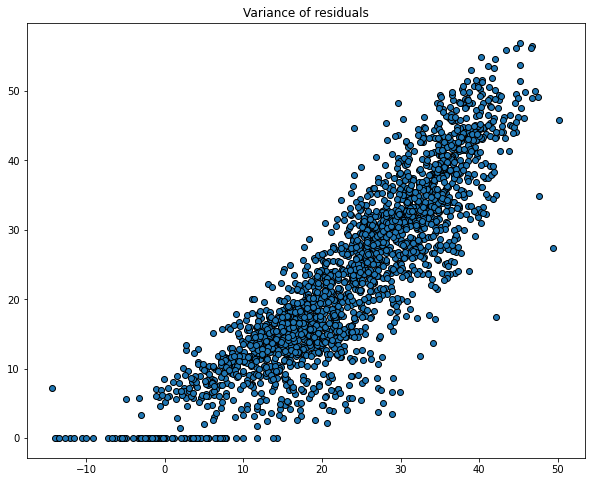

In [49]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_predt_test, y_test,edgecolor='black')
plt.title('Variance of residuals')
plt.show()

# **Ridge Regression**

In [50]:
from sklearn.model_selection import GridSearchCV   #hyperparameter tunning

ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-10,2,8)}, scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10 )

search.fit(x_train,y_train)
print(search.best_params_)


{'alpha': 0.0007196856730011514}


In [51]:

ridge=Ridge(alpha=0.0007)
ridge.fit(x_train,y_train)

Ridge(alpha=0.0007)

In [52]:
y_predt_ridge=ridge.predict(x_test)


In [53]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_predt_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_predt_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_predt_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_predt_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.186847345062894
RMSE : 6.015550460686279
MAE : 4.5983151961113915
R2 : 0.7715494994784157
Adjusted R2 : 0.763220574980233


In [54]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)


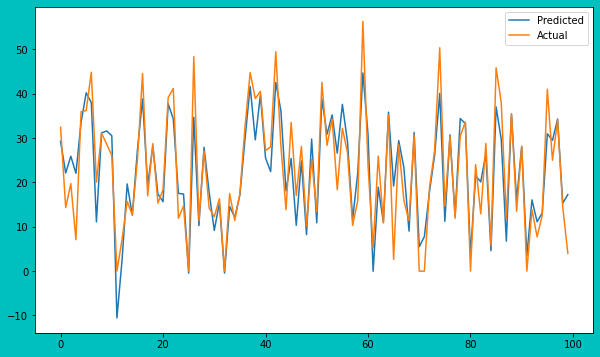

In [55]:
plt.figure(figsize=(10,6),facecolor='c',edgecolor='b')
plt.plot((y_predt_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

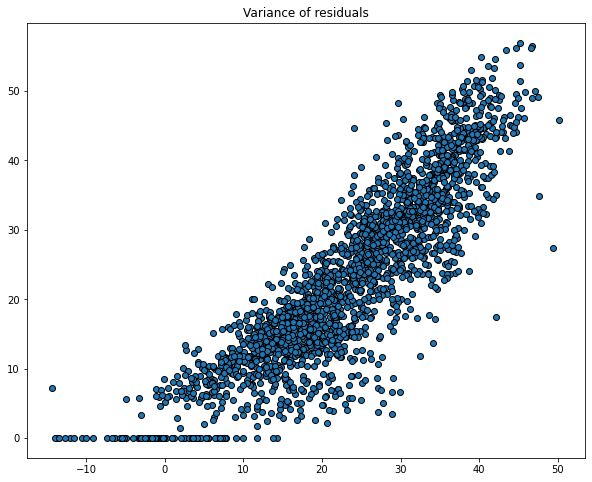

In [56]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_predt_ridge, y_test,edgecolor='black')
plt.title('Variance of residuals')
plt.show()

In [57]:
ridge.coef_

array([ 29.25136218, -13.67279221,   0.26121668,   1.11491172,
         3.35361336, -50.77090915,   1.29144542,  -2.69612699,
        -4.2060174 ,  -6.9900611 ,   3.20031845,  28.90283901,
        -1.40675419,  -0.82959984,  -0.31030713,  -0.35824858,
         0.42041784,   3.93353125,  -0.52770815,  -1.01564106,
        -0.54755665,   1.55573046,   0.53684118,   0.32266719,
        -1.34409708,  -3.2571579 ,  -0.60369465,   1.16401476,
         4.42228195,   0.71793763,  -5.06035909,  -1.74134045,
         0.2190642 ,   0.8647239 ,   0.65125804,   1.66737738,
         0.23326464,  -0.20542158,  -0.64597501,  -0.84380674,
        -1.23513366,  -0.5134147 ,  -0.17004409,  -1.22301152,
        -1.79185751,  -0.86594607,  -0.57987843,   0.17880059,
        -1.58091669,   0.07524652,  -1.12736003,  -0.30722858,
         0.31633255,   0.06228714,  -1.9892358 ,  -4.70268005,
        -7.21841627,  -9.6242365 ,  -8.83295456,  -4.14340827,
         2.10168906,   7.73839747,   1.11662014,  -3.74

# **Lasso Regression** 

In [58]:
from sklearn.model_selection import GridSearchCV#hyperparameter tunning

lasso=Lasso(normalize=True)
search=GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-10,2,8)}, scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10 )

search.fit(x_train,y_train)
print(search.best_params_)

{'alpha': 1.3894954943731361e-05}


In [59]:
lasso=Lasso(normalize=True,alpha=1.3894954943731361e-05)
lasso.fit(x_train,y_train)


Lasso(alpha=1.3894954943731361e-05, normalize=True)

In [60]:
y_predt_train_lasso=lasso.predict(x_train)
y_predt_test_lasso=lasso.predict(x_test)

In [61]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_predt_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_predt_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_predt_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_predt_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.18670436018153
RMSE : 6.015538576069605
MAE : 4.598304269592001
R2 : 0.7715504021535617
Adjusted R2 : 0.7632215105654103


In [62]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)


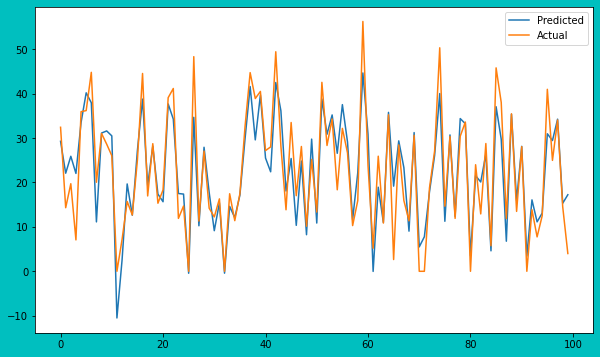

In [63]:
plt.figure(figsize=(10,6),facecolor='c',edgecolor='b')
plt.plot((y_predt_test_lasso)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

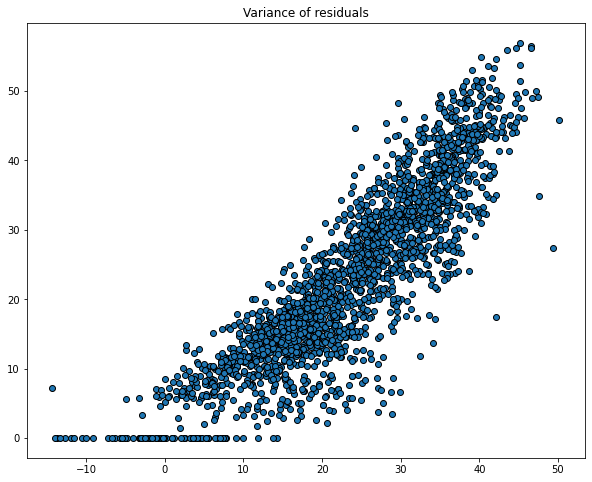

In [64]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_predt_test_lasso, y_test,edgecolor='black')
plt.title('Variance of residuals')
plt.show()

In [65]:
lasso.coef_

array([ 29.17051383, -13.67169483,   0.23595531,   1.11357126,
         3.30743736, -50.77062591,   1.24455416,  -2.67177353,
        -4.15572671,  -6.94220971,   3.1866041 ,  28.88818107,
        -1.35668728,  -0.81481487,  -0.2733669 ,  -0.3167009 ,
         0.45842409,   3.95715133,  -0.48760959,  -0.98181216,
        -0.49505371,   1.59985112,   0.57401763,   0.35287533,
        -1.2942389 ,  -3.17006362,  -0.50732256,   1.25446474,
         4.49862634,   0.79047486,  -4.960244  ,  -1.6031791 ,
         0.32614597,   0.96429044,   0.74024807,   1.74858072,
         0.31704279,  -0.11066932,  -0.5500511 ,  -0.74935217,
        -1.14011883,  -0.41630585,  -0.07311166,  -1.12629067,
        -1.69788037,  -0.77004607,  -0.4854325 ,   0.2624481 ,
        -1.48635808,   0.15725225,  -1.03532178,  -0.21015415,
         0.39879598,   0.14734549,  -1.96893713,  -4.68242446,
        -7.19904828,  -9.60578908,  -8.81427376,  -4.12567398,
         2.11096407,   7.75149663,   1.13758791,  -3.70

# Decision Tree


In [66]:
decisiontreereg=DecisionTreeRegressor()
decisiontreereg.fit(x_train,y_train)


DecisionTreeRegressor()

In [67]:
y_predt_dr=decisiontreereg.predict(x_test)

In [68]:
decisiontreereg.score(x_train,y_train)


1.0

In [69]:
decisiontreereg.score(x_test,y_test)


0.8125684705618632

## Hyperparameter Tunning

In [70]:
# Hyper parameters range intialization for tuning 

#parameters={"splitter":["best","random"],
           # "max_depth" : [1,3,5,7,9,11,12,15,17],
           #"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,12,15],
           #"min_weight_fraction_leaf":[0.001,0.01,0.1,0.2,0.3,0.4,0.5],
           #"max_features":["auto","log2","sqrt",None],
           #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [71]:
#from sklearn.model_selection import GridSearchCV
#search1=GridSearchCV(decisiontreereg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
#search1.fit(x_train,y_train)

In [72]:
# best hyperparameters 
#search1.best_params_ #16min to run

In [73]:
# best model score
#search1.best_score_

In [74]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=17,max_features='auto',max_leaf_nodes= None,min_samples_leaf=10,min_weight_fraction_leaf=0.001,splitter='best')

tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=17, max_features='auto', min_samples_leaf=10,
                      min_weight_fraction_leaf=0.001)

In [75]:
y_tuned_pred=tuned_hyper_model.predict(x_test)


In [76]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_tuned_pred))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_tuned_pred))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_tuned_pred))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_tuned_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 26.52393251374204
RMSE : 5.150139077126174
MAE : 3.521153475060705
R2 : 0.8325522640647556
Adjusted R2 : 0.8264473986921165


In [77]:
y_tuned_pred[:10]

array([29.64642676,  9.91929139, 29.64642676,  6.36275561, 33.61906354,
       35.22186888, 43.87247912, 15.72839919, 30.02267539, 26.66405583])

In [78]:
y_test[:10]

3276    32.434549
139     14.317821
3775    19.723083
3911     7.071068
4695    35.944402
5633    36.193922
6237    44.810713
2095    20.049938
8030    31.032241
6111    28.635642
Name: Rented Bike Count, dtype: float64

In [79]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'decision tree',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)


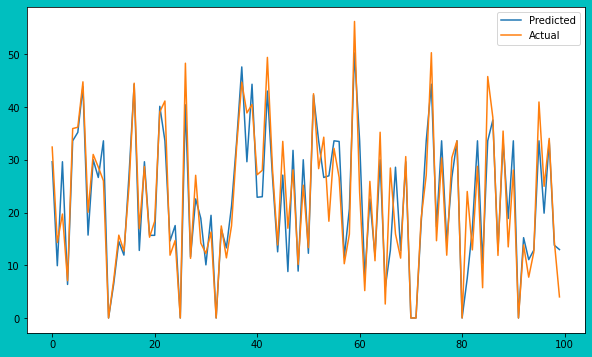

In [80]:
plt.figure(figsize=(10,6),facecolor='c',edgecolor='b')
plt.plot((y_tuned_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

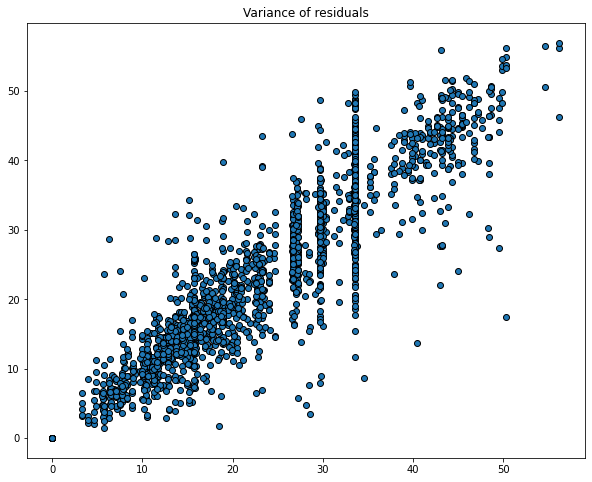

In [81]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_tuned_pred, y_test,edgecolor='black')
plt.title('Variance of residuals')
plt.show()

# Random Forest


In [82]:
rf_model = RandomForestRegressor()


In [83]:
rf_model.fit(x_train, y_train)


RandomForestRegressor()

In [84]:

y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)


In [85]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.794089331914515
RMSE : 3.9741778183562086
MAE : 2.6471161771007696
R2 : 0.9002906338108848
Adjusted R2 : 0.8966553965019066


# Hyperparameter Tunning




In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [87]:
random_grid= {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [1,2,3,4,5, 10],
 'n_estimators': [5,10,30,80,150,200,220 ]}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

   # Use the random grid to search for best hyperparameters
#rf = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
   #Fit the random search model
#rf_random.fit(x_train,y_train)

In [89]:
#rf_random.best_params_

In [90]:
#rf_random.best_estimator_

In [91]:
randmf = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 50, bootstrap=False) 
randmf.fit( x_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=200)

In [92]:
y_tuned_pred1_train=randmf.predict(x_train)
y_tuned_pred1=randmf.predict(x_test)

In [93]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_tuned_pred1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_tuned_pred1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_tuned_pred1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_tuned_pred1))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.791628029197394
RMSE : 3.973868144415136
MAE : 2.753221572383111
R2 : 0.9003061722144462
Adjusted R2 : 0.8966715014097646


In [94]:

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)


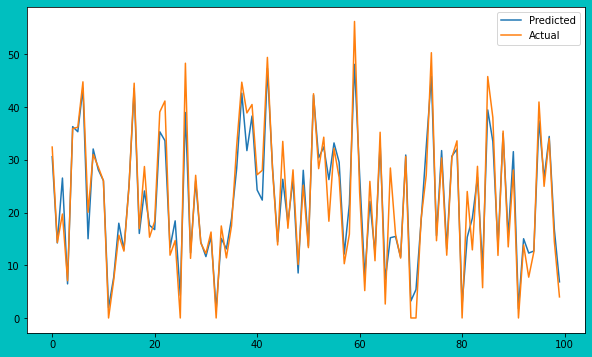

In [95]:
plt.figure(figsize=(10,6),facecolor='c',edgecolor='b')
plt.plot((y_tuned_pred1)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

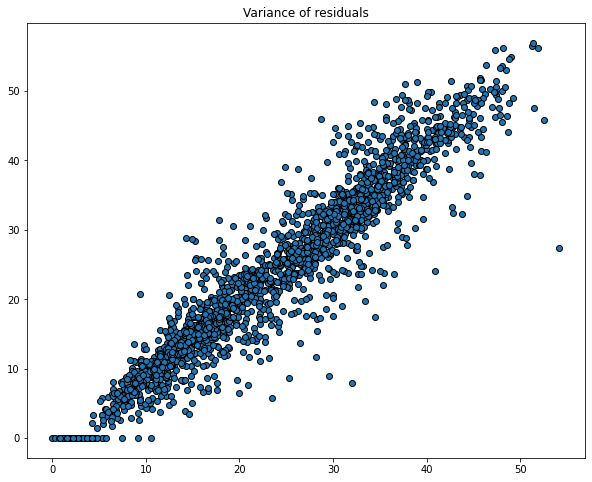

In [96]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_tuned_pred1, y_test,edgecolor='black')
plt.title('Variance of residuals')
plt.show()

In [97]:
# displaying the results of evaluation metric values for all models
result=training_df
result

,Model,MAE,MSE,RMSE,R2,Adj_R2
0,linear regression,4.598,36.187,6.016,0.772,0.76
1,Ridge regression,4.598,36.187,6.016,0.772,0.76
2,lasso regression,4.598,36.187,6.016,0.772,0.76
3,decision tree,3.521,26.524,5.150,0.833,0.83
4,Random forest regression,2.753,15.792,3.974,0.900,0.90


# Conclusion:
 we implemented 5 machine learning algorithms Linear Regression, Lasso,Ridge,Decision Tree, Random Forest,  with Grid Search CV and Randomized Search cv. We did some hyperparameter tuning to improve our model performance.



# Observations:
Out of all above models Random forest Regressor gives the highest R2 score of
89% for Test Set and decision tree gives the highest R2 score of 83% for Test set.